% 线段图

In [3]:
import json

# Input and output file paths
input_file = '/home/zhe/alpaca_evol_instruct_70k.jsonl'
output_file = '/home/zhe/alpaca_evol_instruct_70k_instructions_responses.jsonl'

# Read the input JSONL file
with open(input_file, 'r') as f:
    lines = f.readlines()

# Open the output file for writing
with open(output_file, 'w') as f:
    for line in lines:
        # Parse each line into a JSON object
        entry = json.loads(line.strip())
        
        # Create the 'instruction' and 'response' mapping
        instruction_response = {
            'instruction': entry.get('instruction', ''),
            'response': entry.get('output', '')
        }
        
        # Write the instruction-response pair as a new JSONL line
        f.write(json.dumps(instruction_response) + '\n')

print(f"Converted {input_file} to instruction-response format: {output_file}")


Converted /home/zhe/alpaca_evol_instruct_70k.jsonl to instruction-response format: /home/zhe/alpaca_evol_instruct_70k_instructions_responses.jsonl


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from joypy import joyplot

# Generate synthetic data for the ridge plot
data = []
token_lengths = [10, 20, 30, 40, 50]
nv_pairs = [1, 2, 3, 4, 5]
complexities = [1, 2, 3, 4, 5]

for token_length in token_lengths:
    for nv_pair in nv_pairs:
        for complexity in complexities:
            mean_human, std_human = token_length / 10, nv_pair / 2
            mean_llm, std_llm = complexity, nv_pair / 3

            human_values = np.random.normal(mean_human, std_human, 100)
            llm_values = np.random.normal(mean_llm, std_llm, 100)

            data.extend([
                ("Human", token_length, nv_pair, complexity, val) for val in human_values
            ])
            data.extend([
                ("LLM", token_length, nv_pair, complexity, val) for val in llm_values
            ])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Source", "Token_Length", "NV_Pairs", "Complexity", "Value"])

# Generate the ridge plot for each dimension
for dim in ["Token_Length", "NV_Pairs", "Complexity"]:
    plt.figure(figsize=(12, 8))
    joyplot(
        data=df, 
        by="Source", 
        column="Value", 
        overlap=0.5,
        kind="kde",
        colormap=sns.color_palette("crest", as_cmap=True),
        grid="y",
        fade=True
    )

    # Add labels and title
    plt.xlabel("Value")
    plt.title(f"Ridgeline Plot: Human vs LLM Distributions ({dim})")
    plt.tight_layout()
    plt.show()


KeyError: 'Arm'

In [18]:
!pip install joypy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# Generate data for human distribution
mean_human = [2, 3]
cov_human = [[1, 0.5], [0.5, 1]]

# Generate data for LLM distribution
mean_llm = [3, 2]
cov_llm = [[1, -0.4], [-0.4, 1]]

# Grid for plotting
x, y = np.linspace(0, 5, 500), np.linspace(0, 5, 500)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Multivariate normal distributions
rv_human = multivariate_normal(mean_human, cov_human)
rv_llm = multivariate_normal(mean_llm, cov_llm)

# Calculate densities
z_human = rv_human.pdf(pos)
z_llm = rv_llm.pdf(pos)
z_overlap = np.minimum(z_human, z_llm)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Contours
ax.contourf(x, y, z_human, levels=20, cmap="Blues", alpha=0.7, label="Human Distribution")
ax.contourf(x, y, z_llm, levels=20, cmap="Oranges", alpha=0.7, label="LLM Distribution")
ax.contourf(x, y, z_overlap, levels=20, cmap="Greens", alpha=0.5, label="Overlap")

# Add labels and styling
ax.set_title("Human vs LLM Distribution", fontsize=16)
ax.set_xlabel("Feature 1", fontsize=12)
ax.set_ylabel("Feature 2", fontsize=12)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

# Add legend manually for combined distributions
handles = [
    plt.Line2D([0], [0], color="blue", lw=4, label="Human Distribution"),
    plt.Line2D([0], [0], color="orange", lw=4, label="LLM Distribution"),
    plt.Line2D([0], [0], color="green", lw=4, label="Overlap")
]
ax.legend(handles=handles, loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()


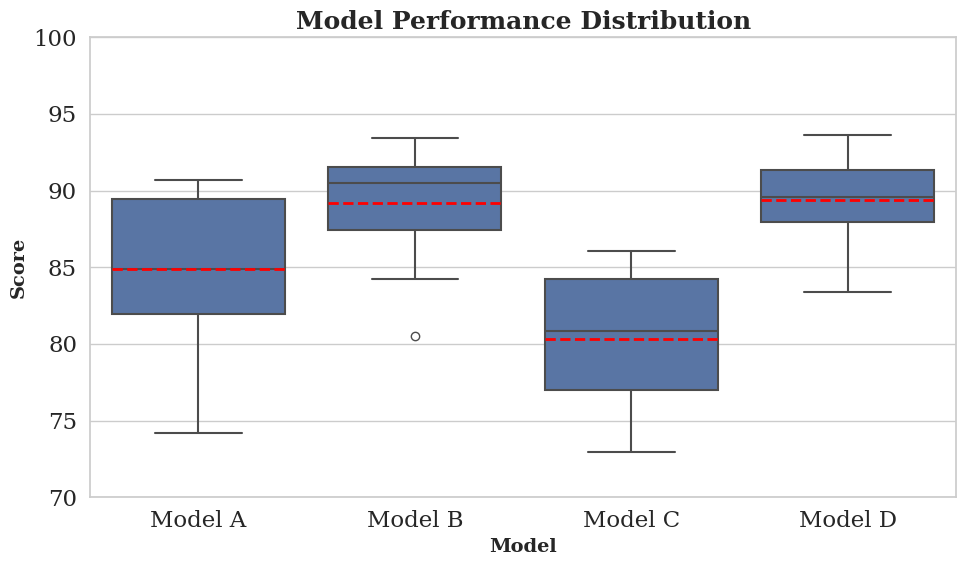

In [16]:
# 示例数据：模拟模型性能
models = ['Model A', 'Model B', 'Model C', 'Model D']
scores = {
    'Model': np.repeat(models, 20),
    'Score': np.concatenate([
        np.random.normal(loc=85, scale=5, size=20),
        np.random.normal(loc=88, scale=4, size=20),
        np.random.normal(loc=83, scale=6, size=20),
        np.random.normal(loc=90, scale=3, size=20),
    ])
}

df_scores = pd.DataFrame(scores)

# 设置 ACL 风格的图表
sns.set_theme(style="whitegrid", font="serif", font_scale=1.5)

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="Score", data=df_scores, linewidth=1.5, showmeans=True, meanline=True, meanprops={"color": "red", "linewidth": 2})

# 美化图表
plt.title("Model Performance Distribution", fontsize=18, weight="bold")
plt.xlabel("Model", fontsize=14, weight="bold")
plt.ylabel("Score", fontsize=14, weight="bold")
plt.ylim(70, 100)

plt.tight_layout()
plt.show()


In [14]:
!pip install seaborn


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


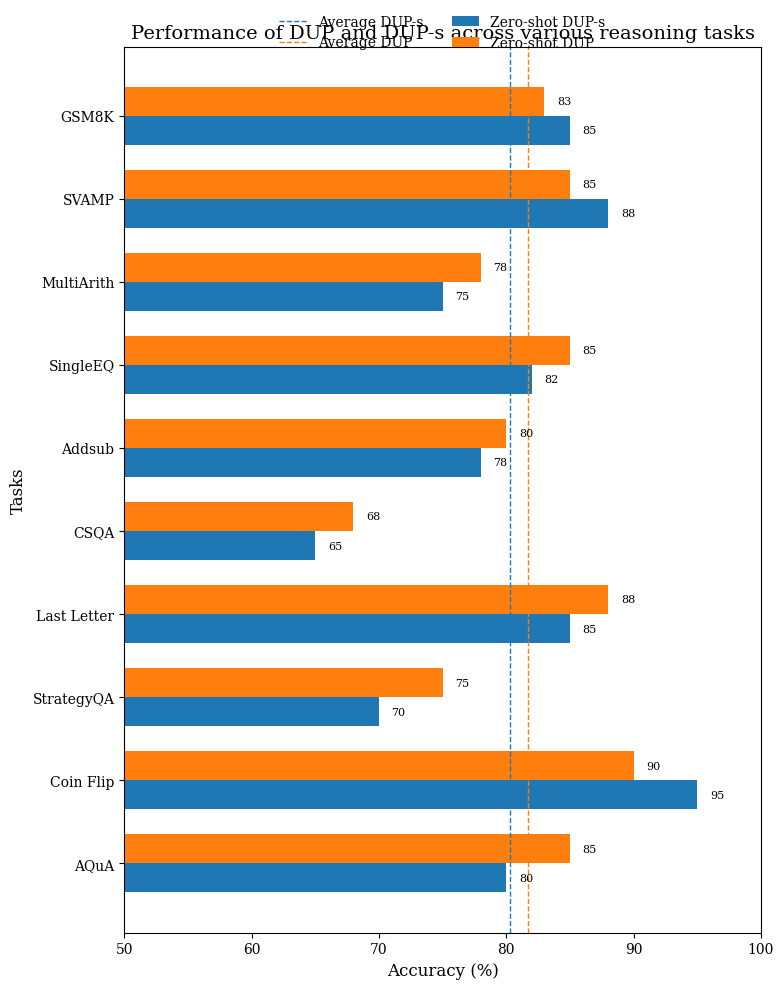

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
data = {
    "AQuA": [80, 85],
    "Coin Flip": [95, 90],
    "StrategyQA": [70, 75],
    "Last Letter": [85, 88],
    "CSQA": [65, 68],
    "Addsub": [78, 80],
    "SingleEQ": [82, 85],
    "MultiArith": [75, 78],
    "SVAMP": [88, 85],
    "GSM8K": [85, 83]
}

categories = list(data.keys())
y = np.arange(len(categories))
height = 0.35

# Data for average lines
avg_dup_s = np.mean([v[0] for v in data.values()])
avg_dup = np.mean([v[1] for v in data.values()])

# Plotting
fig, ax = plt.subplots(figsize=(8, 10))

# Bars
bars_dup_s = ax.barh(y - height / 2, [v[0] for v in data.values()], height, label="Zero-shot DUP-s", color="#1f77b4")
bars_dup = ax.barh(y + height / 2, [v[1] for v in data.values()], height, label="Zero-shot DUP", color="#ff7f0e")

# Average lines
ax.axvline(avg_dup_s, color="#1f77b4", linestyle="--", linewidth=1, label="Average DUP-s")
ax.axvline(avg_dup, color="#ff7f0e", linestyle="--", linewidth=1, label="Average DUP")

# Labels, ticks, and title
ax.set_xlabel("Accuracy (%)")
ax.set_ylabel("Tasks")
ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.set_xlim(50, 100)
ax.set_title("Performance of DUP and DUP-s across various reasoning tasks")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)

# Add bar values
for bar in bars_dup_s:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", va="center", ha="left", fontsize=8)
for bar in bars_dup:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", va="center", ha="left", fontsize=8)

plt.tight_layout()
plt.show()


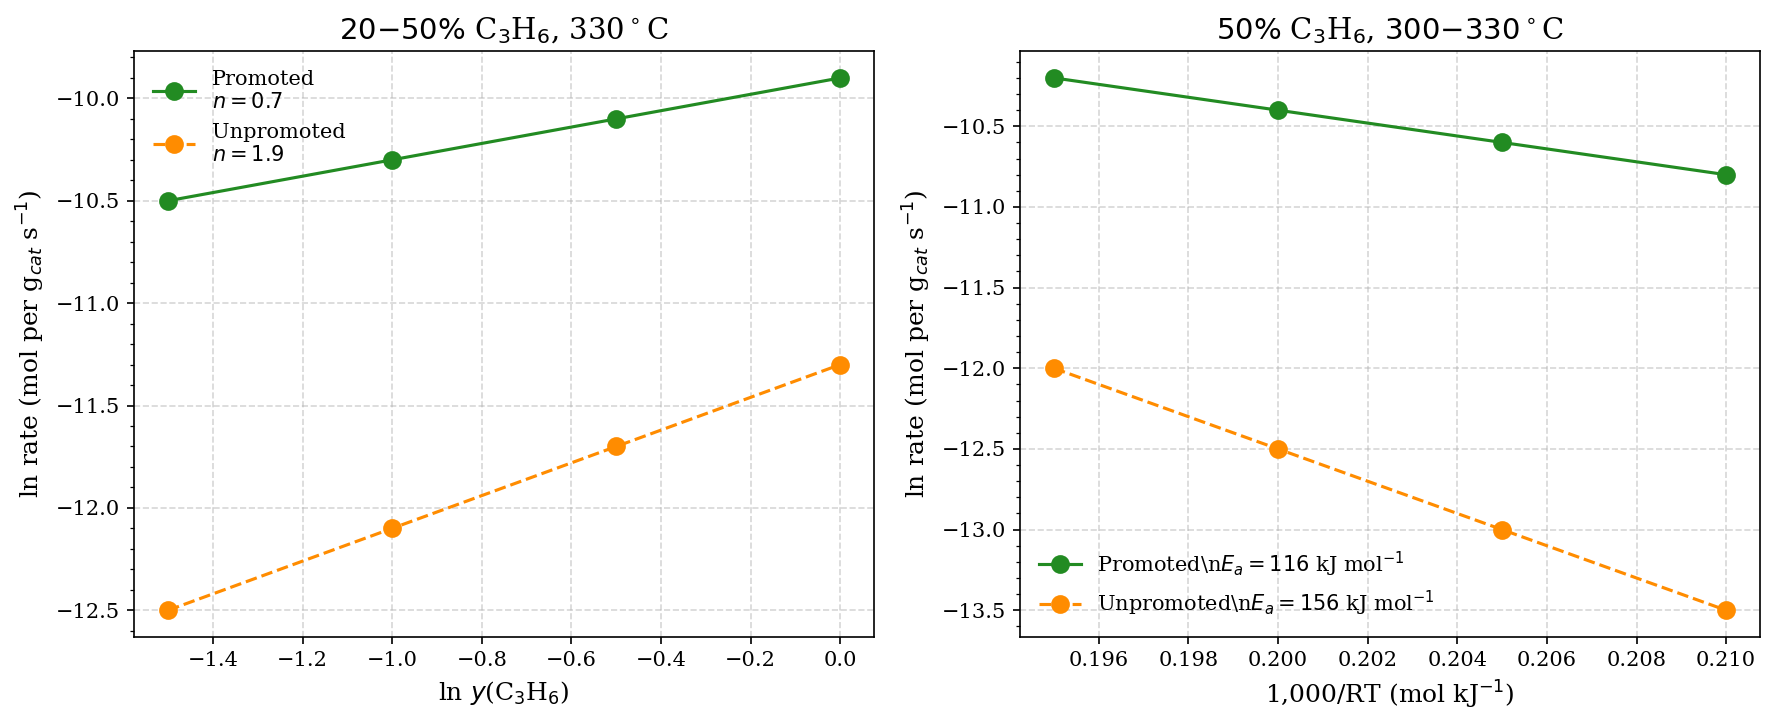

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# 数据
ln_C3H6 = np.array([-1.5, -1.0, -0.5, 0.0])
ln_rate_promoted = np.array([-10.5, -10.3, -10.1, -9.9])
ln_rate_unpromoted = np.array([-12.5, -12.1, -11.7, -11.3])

inv_temp = np.array([0.195, 0.200, 0.205, 0.210])
ln_rate_promoted_b = np.array([-10.2, -10.4, -10.6, -10.8])
ln_rate_unpromoted_b = np.array([-12.0, -12.5, -13.0, -13.5])

# 设置全局字体
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

# 创建图形
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# 图 a
axs[0].plot(ln_C3H6, ln_rate_promoted, 'o-', color='forestgreen', label="Promoted\n$n = 0.7$", markersize=8, linewidth=1.5)
axs[0].plot(ln_C3H6, ln_rate_unpromoted, 'o--', color='darkorange', label="Unpromoted\n$n = 1.9$", markersize=8, linewidth=1.5)
axs[0].set_xlabel(r'ln $y$(C$_3$H$_6$)')
axs[0].set_ylabel(r'ln rate (mol per g$_{cat}$ s$^{-1}$)')
axs[0].set_title(r'$20{-}50\%$ C$_3$H$_6$, 330$^\circ$C')
axs[0].legend(loc='upper left', frameon=False)
axs[0].grid(visible=True, linestyle='--', alpha=0.5)
axs[0].yaxis.set_minor_locator(AutoMinorLocator())

# 图 b
axs[1].plot(inv_temp, ln_rate_promoted_b, 'o-', color='forestgreen', label=r"Promoted\n$E_a = 116$ kJ mol$^{-1}$", markersize=8, linewidth=1.5)
axs[1].plot(inv_temp, ln_rate_unpromoted_b, 'o--', color='darkorange', label=r"Unpromoted\n$E_a = 156$ kJ mol$^{-1}$", markersize=8, linewidth=1.5)
axs[1].set_xlabel(r'1,000/RT (mol kJ$^{-1}$)')
axs[1].set_ylabel(r'ln rate (mol per g$_{cat}$ s$^{-1}$)')
axs[1].set_title(r'$50\%$ C$_3$H$_6$, $300{-}330^\circ$C')
axs[1].legend(loc='lower left', frameon=False)
axs[1].grid(visible=True, linestyle='--', alpha=0.5)
axs[1].yaxis.set_minor_locator(AutoMinorLocator())

# 调整整体布局和背景透明
fig.tight_layout()
fig.patch.set_alpha(0)  # 背景透明

# 保存图像
plt.savefig("advanced_plot.png", dpi=300, bbox_inches='tight', transparent=True)

# 显示图形
plt.show()


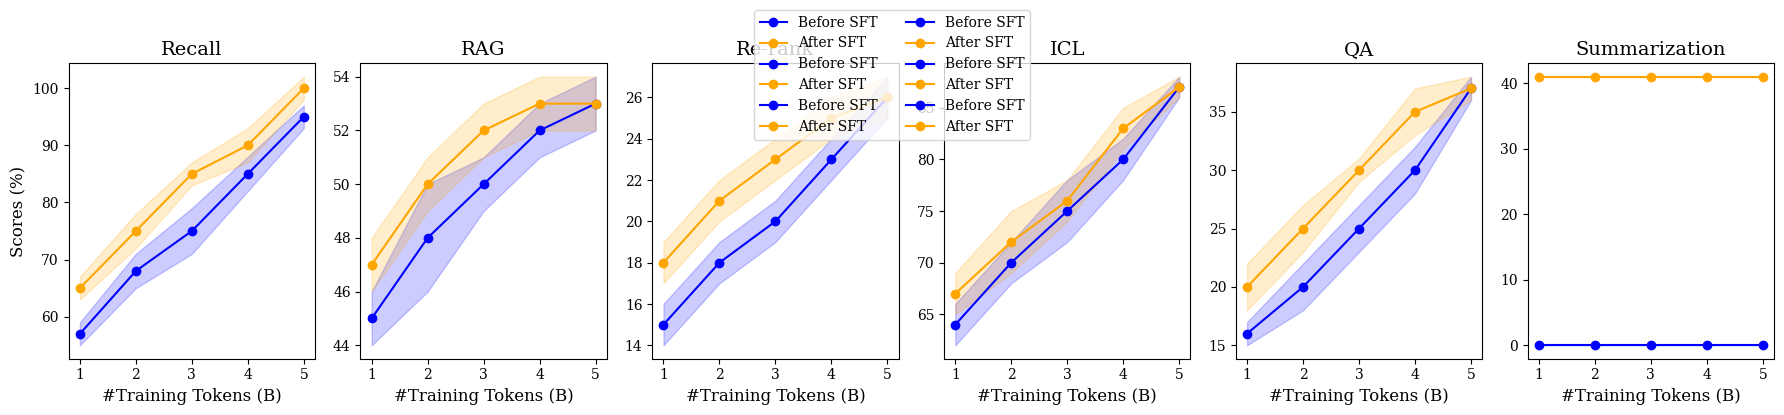

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
x = np.arange(1, 6)
before_sft_means = {
    "Recall": [57, 68, 75, 85, 95],
    "RAG": [45, 48, 50, 52, 53],
    "Re-rank": [15, 18, 20, 23, 26],
    "ICL": [64, 70, 75, 80, 87],
    "QA": [16, 20, 25, 30, 37],
    "Summarization": [0, 0, 0, 0, 0],
}
after_sft_means = {
    "Recall": [65, 75, 85, 90, 100],
    "RAG": [47, 50, 52, 53, 53],
    "Re-rank": [18, 21, 23, 25, 26],
    "ICL": [67, 72, 76, 83, 87],
    "QA": [20, 25, 30, 35, 37],
    "Summarization": [41, 41, 41, 41, 41],
}

before_sft_std = {
    "Recall": [2, 3, 4, 3, 2],
    "RAG": [1, 2, 1, 1, 1],
    "Re-rank": [1, 1, 1, 1, 1],
    "ICL": [2, 2, 3, 2, 1],
    "QA": [1, 2, 2, 2, 1],
    "Summarization": [0, 0, 0, 0, 0],
}
after_sft_std = {
    "Recall": [2, 3, 2, 3, 2],
    "RAG": [1, 1, 1, 1, 1],
    "Re-rank": [1, 1, 1, 1, 1],
    "ICL": [2, 3, 2, 2, 1],
    "QA": [2, 2, 1, 2, 1],
    "Summarization": [0, 0, 0, 0, 0],
}

# Plotting
fig, axes = plt.subplots(1, 6, figsize=(18, 4), sharex=True, sharey=False)
metrics = list(before_sft_means.keys())

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.plot(x, before_sft_means[metric], label="Before SFT", marker="o", color="blue")
    ax.fill_between(
        x,
        np.array(before_sft_means[metric]) - np.array(before_sft_std[metric]),
        np.array(before_sft_means[metric]) + np.array(before_sft_std[metric]),
        color="blue",
        alpha=0.2,
    )
    ax.plot(x, after_sft_means[metric], label="After SFT", marker="o", color="orange")
    ax.fill_between(
        x,
        np.array(after_sft_means[metric]) - np.array(after_sft_std[metric]),
        np.array(after_sft_means[metric]) + np.array(after_sft_std[metric]),
        color="orange",
        alpha=0.2,
    )
    ax.set_title(metric)
    ax.set_xticks(x)
    if i == 0:
        ax.set_ylabel("Scores (%)")
    ax.set_xlabel("#Training Tokens (B)")

# Legend
fig.legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()
plt.show()


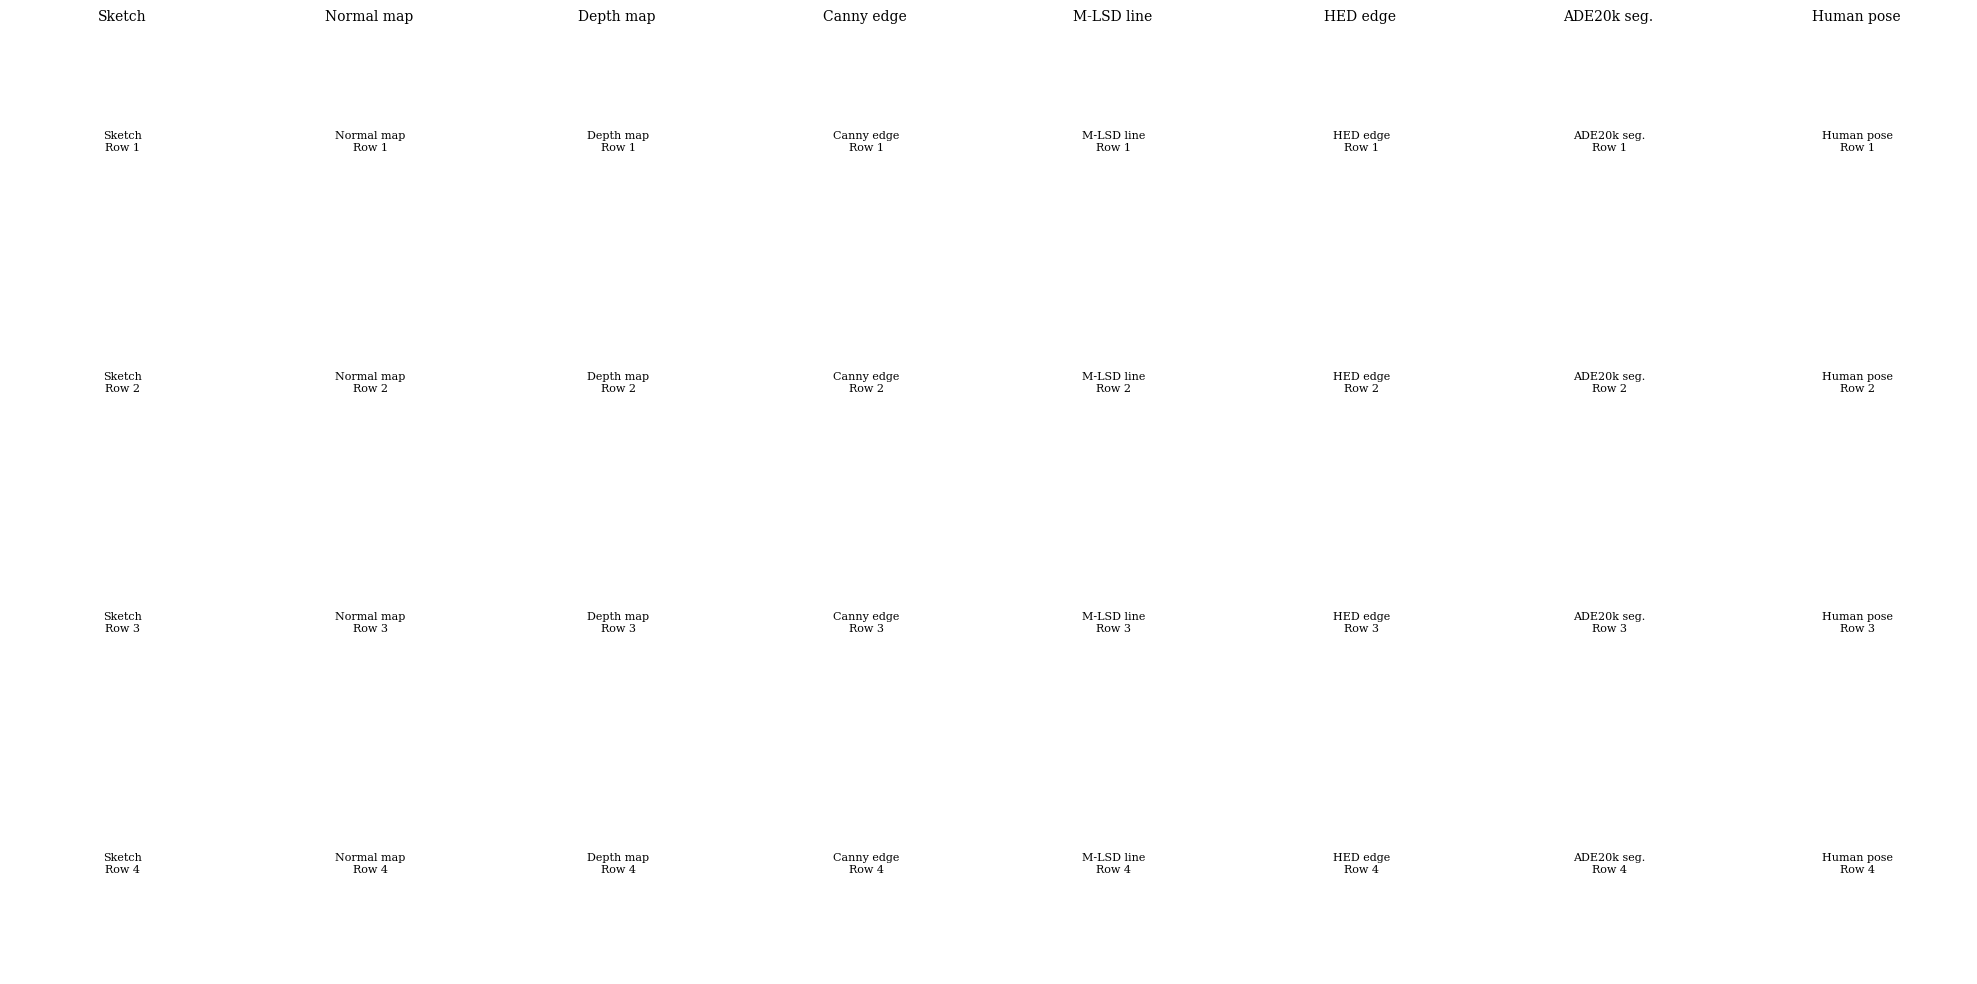

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to create a dummy image with text
def create_dummy_image(text, size=(100, 100), color=(1, 1, 1)):
    img = np.ones((size[0], size[1], 3)) * np.array(color).reshape(1, 1, 3)
    plt.imshow(img)
    plt.text(
        size[1] // 2,
        size[0] // 2,
        text,
        color="black",
        fontsize=8,
        ha="center",
        va="center",
    )
    plt.axis("off")

# Example column titles and dummy content
columns = ["Sketch", "Normal map", "Depth map", "Canny edge", 
           "M-LSD line", "HED edge", "ADE20k seg.", "Human pose"]
rows = 4

# Create the figure and grid
fig, axes = plt.subplots(rows, len(columns), figsize=(20, 10))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# Fill the grid with dummy images
for col, title in enumerate(columns):
    for row in range(rows):
        plt.sca(axes[row, col])
        create_dummy_image(f"{title}\nRow {row+1}")

    # Set title for each column
    axes[0, col].set_title(title, fontsize=10)

plt.tight_layout()
plt.show()
# 关于好看的画图



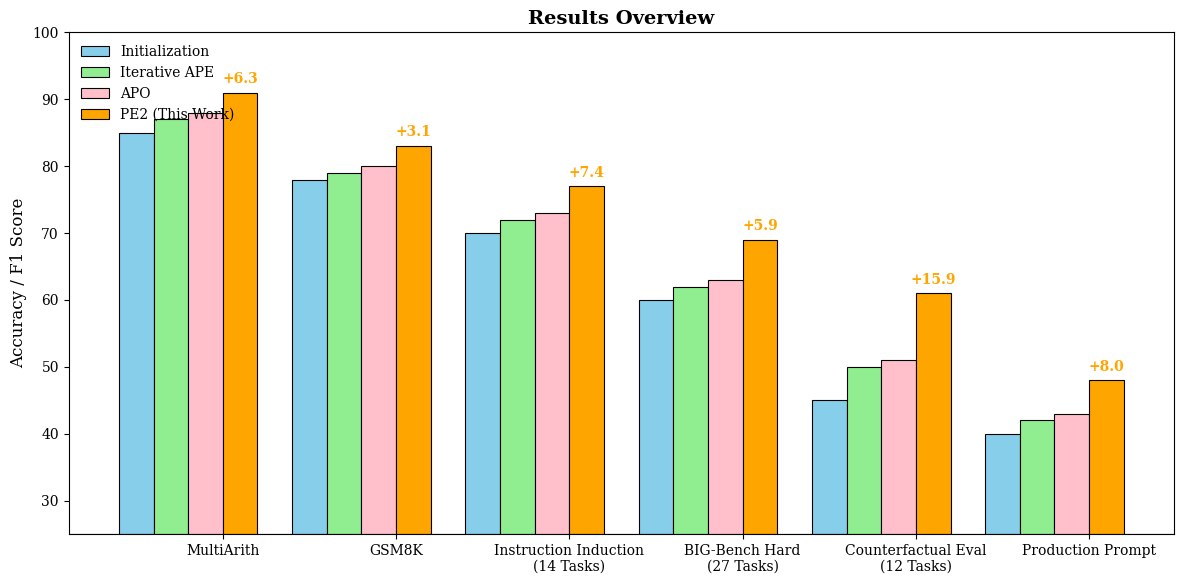

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = [
    "MultiArith",
    "GSM8K",
    "Instruction Induction\n(14 Tasks)",
    "BIG-Bench Hard\n(27 Tasks)",
    "Counterfactual Eval\n(12 Tasks)",
    "Production Prompt"
]
methods = ["Initialization", "Iterative APE", "APO", "PE2 (This Work)"]

# 数据矩阵，每行是一个类别的四种方法得分
data = np.array([
    [85, 87, 88, 91],  # MultiArith
    [78, 79, 80, 83],  # GSM8K
    [70, 72, 73, 77],  # Instruction Induction
    [60, 62, 63, 69],  # BIG-Bench Hard
    [45, 50, 51, 61],  # Counterfactual Eval
    [40, 42, 43, 48],  # Production Prompt
])
increments = [6.3, 3.1, 7.4, 5.9, 15.9, 8.0]

# 设置图形
fig, ax = plt.subplots(figsize=(12, 6))

# 参数设置
x = np.arange(len(categories))  # 横轴位置
width = 0.2  # 柱宽
colors = ["skyblue", "lightgreen", "pink", "orange"]

# 绘制柱状图
for i in range(len(methods)):
    ax.bar(x + i * width - 1.5 * width, data[:, i], width, label=methods[i], color=colors[i], edgecolor='black', linewidth=0.8)

# 添加增量标注
for i, inc in enumerate(increments):
    ax.text(x[i] + 3 * width - 1.5 * width, data[i, -1] + 1, f"+{inc}", 
            ha='center', va='bottom', fontsize=10, color="orange", fontweight='bold')

# 设置轴标签、标题和刻度
ax.set_ylabel("Accuracy / F1 Score", fontsize=12)
ax.set_ylim(25, 100)  # y轴范围
ax.set_xticks(x + width)  # 调整x轴刻度位置
ax.set_xticklabels(categories, fontsize=10)
ax.set_title("Results Overview", fontsize=14, fontweight="bold")
ax.axhline(25, color="black", linewidth=0.8)  # 添加底线

# 添加图例
ax.legend(loc="upper left", fontsize=10, frameon=False)

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig("results_overview.png", dpi=300, bbox_inches="tight", transparent=True)

# 显示图形
plt.show()


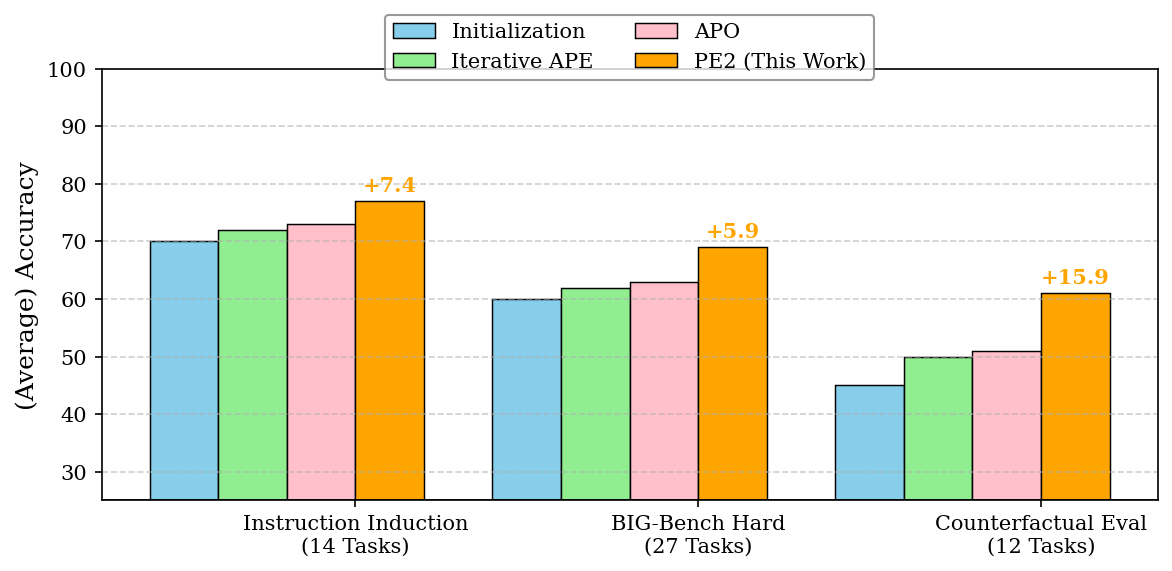

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["Instruction Induction\n(14 Tasks)", "BIG-Bench Hard\n(27 Tasks)", "Counterfactual Eval\n(12 Tasks)"]
methods = ["Initialization", "Iterative APE", "APO", "PE2 (This Work)"]

# 每组柱状图数据
data = np.array([
    [70, 72, 73, 77],  # Instruction Induction
    [60, 62, 63, 69],  # BIG-Bench Hard
    [45, 50, 51, 61]   # Counterfactual Eval
])
increments = [7.4, 5.9, 15.9]

# 配置
x = np.arange(len(categories))  # x轴位置
width = 0.2  # 每个柱子的宽度
colors = ["skyblue", "lightgreen", "pink", "orange"]

# 创建图形
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# 绘制每组柱状图
for i in range(len(methods)):
    ax.bar(x + i * width - 1.5 * width, data[:, i], width, label=methods[i], color=colors[i], edgecolor="black", linewidth=0.7)

# 增量标注
for i, inc in enumerate(increments):
    ax.text(x[i] + 3 * width - 1.5 * width, data[i, -1] + 1, f"+{inc}", 
            ha='center', va='bottom', fontsize=10, color="orange", fontweight="bold")

# 设置轴和标题
ax.set_ylabel("(Average) Accuracy", fontsize=12)
ax.set_ylim(25, 100)  # 设置y轴范围
ax.set_xticks(x + width)  # 调整x轴刻度位置
ax.set_xticklabels(categories, fontsize=10)
ax.axhline(25, color="black", linewidth=0.8)  # 添加底线

# 图例设置
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=10, frameon=True, edgecolor="gray")

# 美化网格
ax.grid(visible=True, axis='y', linestyle='--', alpha=0.6)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig("overview_plot.png", dpi=300, bbox_inches="tight", transparent=True)

# 显示图形
plt.show()


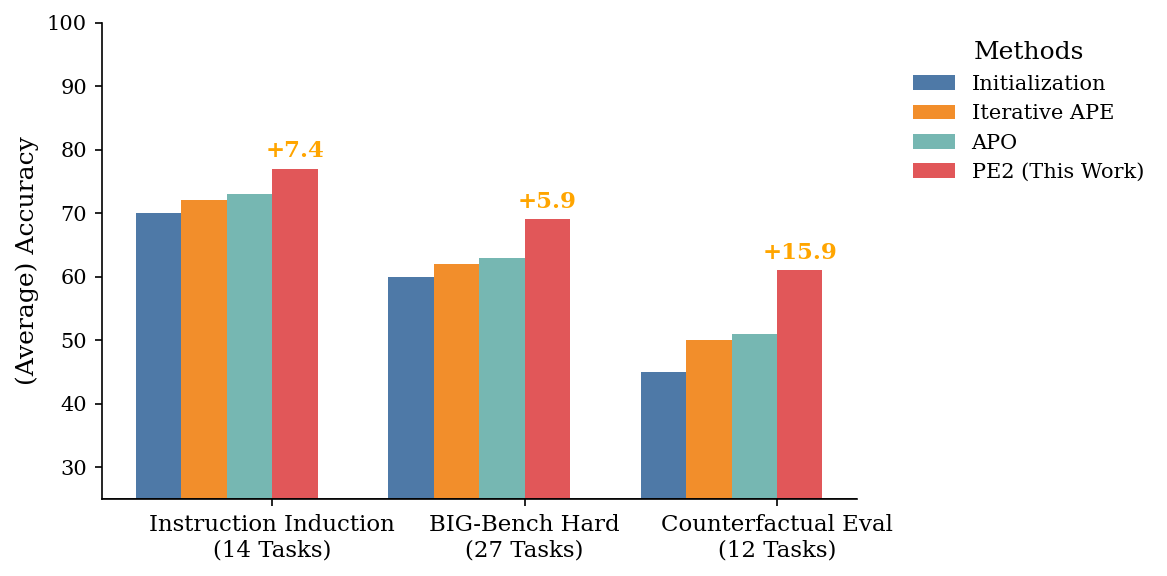

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["Instruction Induction\n(14 Tasks)", "BIG-Bench Hard\n(27 Tasks)", "Counterfactual Eval\n(12 Tasks)"]
methods = ["Initialization", "Iterative APE", "APO", "PE2 (This Work)"]

# 每组柱状图数据
data = np.array([
    [70, 72, 73, 77],  # Instruction Induction
    [60, 62, 63, 69],  # BIG-Bench Hard
    [45, 50, 51, 61]   # Counterfactual Eval
])
increments = [7.4, 5.9, 15.9]

# 配置
x = np.arange(len(categories))  # x轴位置
width = 0.18  # 每个柱子的宽度
colors = ["#4E79A7", "#F28E2B", "#76B7B2", "#E15759"]  # 自定义颜色（高级调色板）

# 创建图形
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# 绘制每组柱状图
for i in range(len(methods)):
    ax.bar(x + i * width - 1.5 * width, data[:, i], width, label=methods[i], color=colors[i], edgecolor="none")

# 增量标注
for i, inc in enumerate(increments):
    ax.text(x[i] + 3 * width - 1.5 * width, data[i, -1] + 1, f"+{inc}", 
            ha='center', va='bottom', fontsize=11, color="orange", fontweight="bold")

# 设置轴和标题
ax.set_ylabel("(Average) Accuracy", fontsize=12)
ax.set_ylim(25, 100)  # 设置y轴范围
ax.set_xticks(x + width)  # 调整x轴刻度位置
ax.set_xticklabels(categories, fontsize=11)
ax.spines['top'].set_visible(False)  # 移除顶部边框
ax.spines['right'].set_visible(False)  # 移除右侧边框
ax.spines['left'].set_linewidth(0.8)  # 左边框加细
ax.spines['bottom'].set_linewidth(0.8)  # 底边框加细
ax.axhline(25, color="black", linewidth=0.8)  # 添加底线

# 移除背景网格
ax.grid(False)

# 图例设置
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), fontsize=10, frameon=False, title="Methods", title_fontsize=12)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig("overview_plot_optimized.png", dpi=300, bbox_inches="tight", transparent=True)

# 显示图形
plt.show()


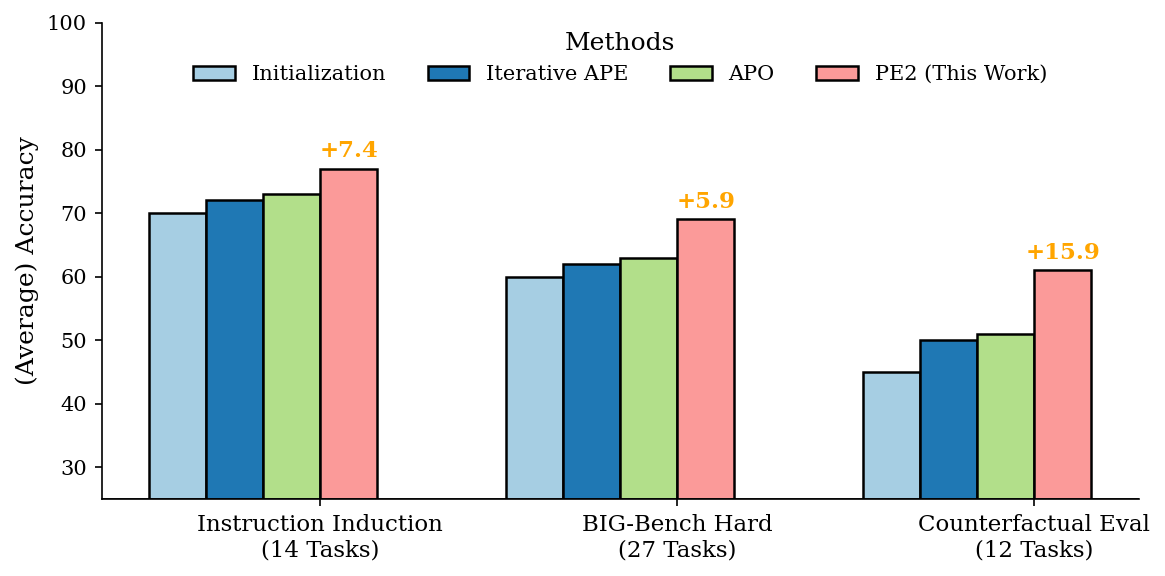

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["Instruction Induction\n(14 Tasks)", "BIG-Bench Hard\n(27 Tasks)", "Counterfactual Eval\n(12 Tasks)"]
methods = ["Initialization", "Iterative APE", "APO", "PE2 (This Work)"]

# 每组柱状图数据
data = np.array([
    [70, 72, 73, 77],  # Instruction Induction
    [60, 62, 63, 69],  # BIG-Bench Hard
    [45, 50, 51, 61]   # Counterfactual Eval
])
increments = [7.4, 5.9, 15.9]

# 配置
x = np.arange(len(categories))  # x轴位置
width = 0.16  # 每个柱子的宽度，控制柱间间隙
colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#FB9A99"]  # 专业配色方案

# 创建图形
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# 绘制每组柱状图
for i in range(len(methods)):
    ax.bar(
        x + i * width - 1.5 * width,  # 调整柱子位置
        data[:, i], 
        width, 
        label=methods[i], 
        color=colors[i], 
        edgecolor="black",  # 设置边框颜色
        linewidth=1.2  # 边框加粗
    )

# 增量标注
for i, inc in enumerate(increments):
    ax.text(
        x[i] + 3 * width - 1.5 * width, 
        data[i, -1] + 1, 
        f"+{inc}", 
        ha="center", 
        va="bottom", 
        fontsize=11, 
        color="orange", 
        fontweight="bold"
    )

# 设置轴和标题
ax.set_ylabel("(Average) Accuracy", fontsize=12)
ax.set_ylim(25, 100)  # 设置y轴范围
ax.set_xticks(x + width)  # 调整x轴刻度位置
ax.set_xticklabels(categories, fontsize=11)
ax.spines["top"].set_visible(False)  # 移除顶部边框
ax.spines["right"].set_visible(False)  # 移除右侧边框
ax.spines["left"].set_linewidth(0.8)  # 左边框加细
ax.spines["bottom"].set_linewidth(0.8)  # 底边框加细
ax.axhline(25, color="black", linewidth=0.8)  # 添加底线

# 图例设置：放入图表内
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.02), 
    ncol=4, 
    fontsize=10, 
    frameon=False, 
    title="Methods", 
    title_fontsize=12
)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig("final_overview_plot.png", dpi=300, bbox_inches="tight", transparent=True)

# 显示图形
plt.show()


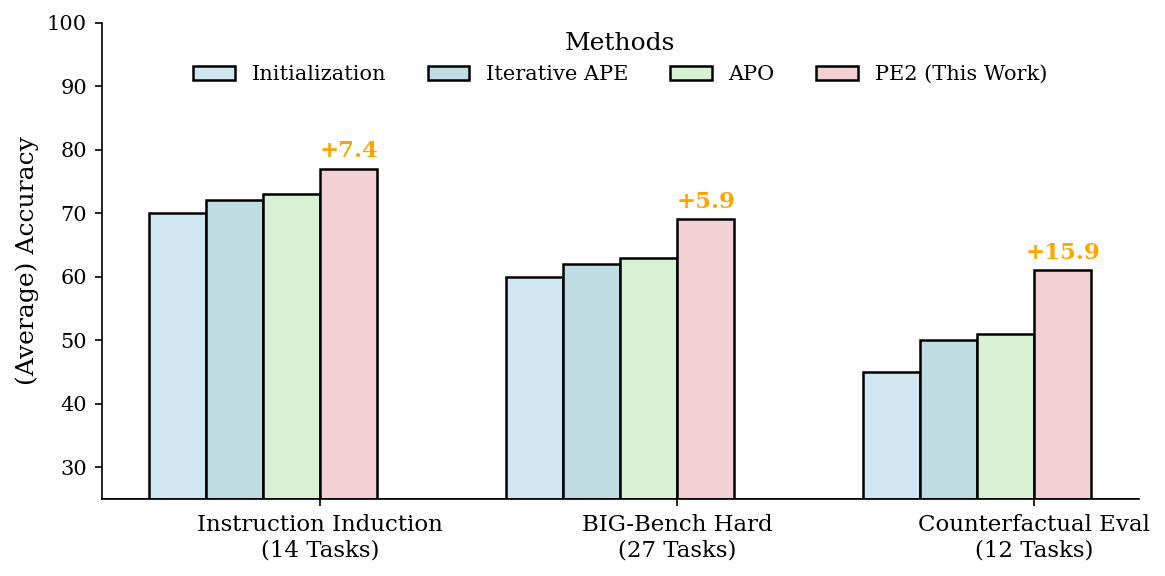

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["Instruction Induction\n(14 Tasks)", "BIG-Bench Hard\n(27 Tasks)", "Counterfactual Eval\n(12 Tasks)"]
methods = ["Initialization", "Iterative APE", "APO", "PE2 (This Work)"]

# 每组柱状图数据
data = np.array([
    [70, 72, 73, 77],  # Instruction Induction
    [60, 62, 63, 69],  # BIG-Bench Hard
    [45, 50, 51, 61]   # Counterfactual Eval
])
increments = [7.4, 5.9, 15.9]

# 配置
x = np.arange(len(categories))  # x轴位置
width = 0.16  # 每个柱子的宽度，控制柱间间隙
colors = ["#D0E7F2", "#BFDCE2", "#D9F2D3", "#F2D0D3"]  # 淡雅配色

# 创建图形
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# 绘制每组柱状图
for i in range(len(methods)):
    ax.bar(
        x + i * width - 1.5 * width,  # 调整柱子位置
        data[:, i], 
        width, 
        label=methods[i], 
        color=colors[i], 
        edgecolor="black",  # 设置边框颜色
        linewidth=1.2  # 边框加粗
    )

# 增量标注
for i, inc in enumerate(increments):
    ax.text(
        x[i] + 3 * width - 1.5 * width, 
        data[i, -1] + 1, 
        f"+{inc}", 
        ha="center", 
        va="bottom", 
        fontsize=11, 
        color="orange", 
        fontweight="bold"
    )

# 设置轴和标题
ax.set_ylabel("(Average) Accuracy", fontsize=12)
ax.set_ylim(25, 100)  # 设置y轴范围
ax.set_xticks(x + width)  # 调整x轴刻度位置
ax.set_xticklabels(categories, fontsize=11)
ax.spines["top"].set_visible(False)  # 移除顶部边框
ax.spines["right"].set_visible(False)  # 移除右侧边框
ax.spines["left"].set_linewidth(0.8)  # 左边框加细
ax.spines["bottom"].set_linewidth(0.8)  # 底边框加细
ax.axhline(25, color="black", linewidth=0.8)  # 添加底线

# 图例设置：放入图表内
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.02), 
    ncol=4, 
    fontsize=10, 
    frameon=False, 
    title="Methods", 
    title_fontsize=12
)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig("final_overview_plot_light_colors.png", dpi=300, bbox_inches="tight", transparent=True)

# 显示图形
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

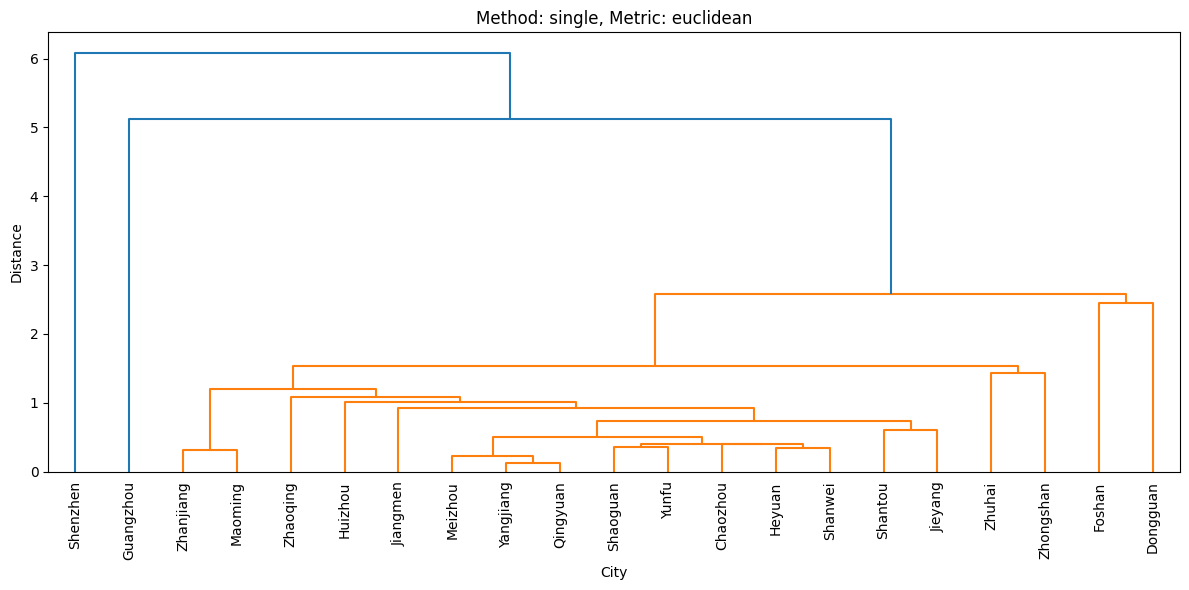

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

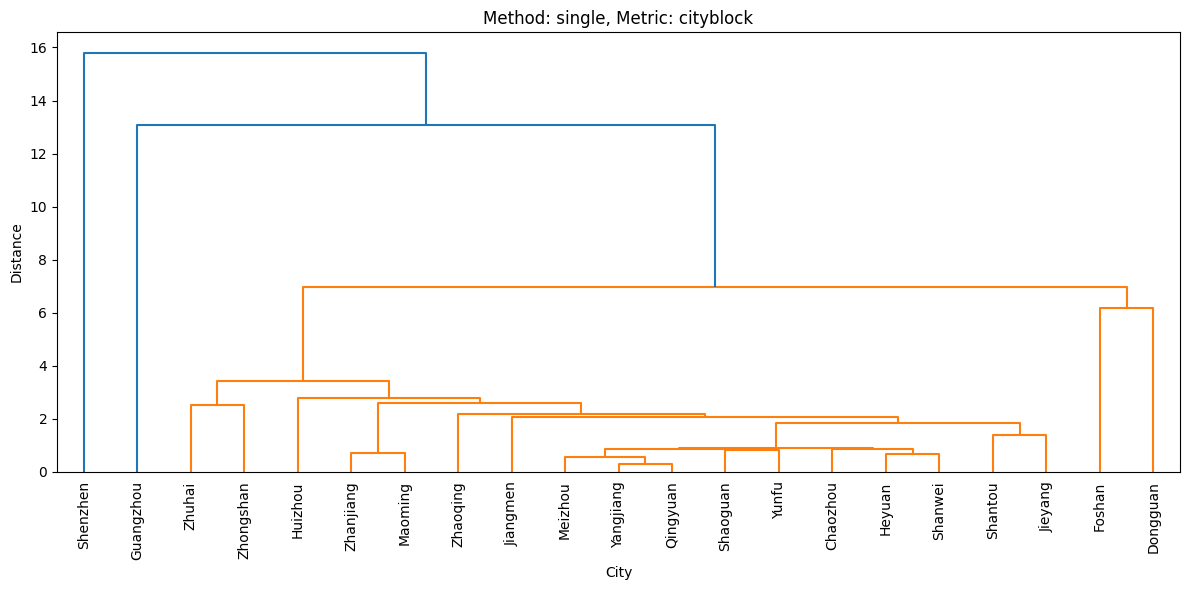

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

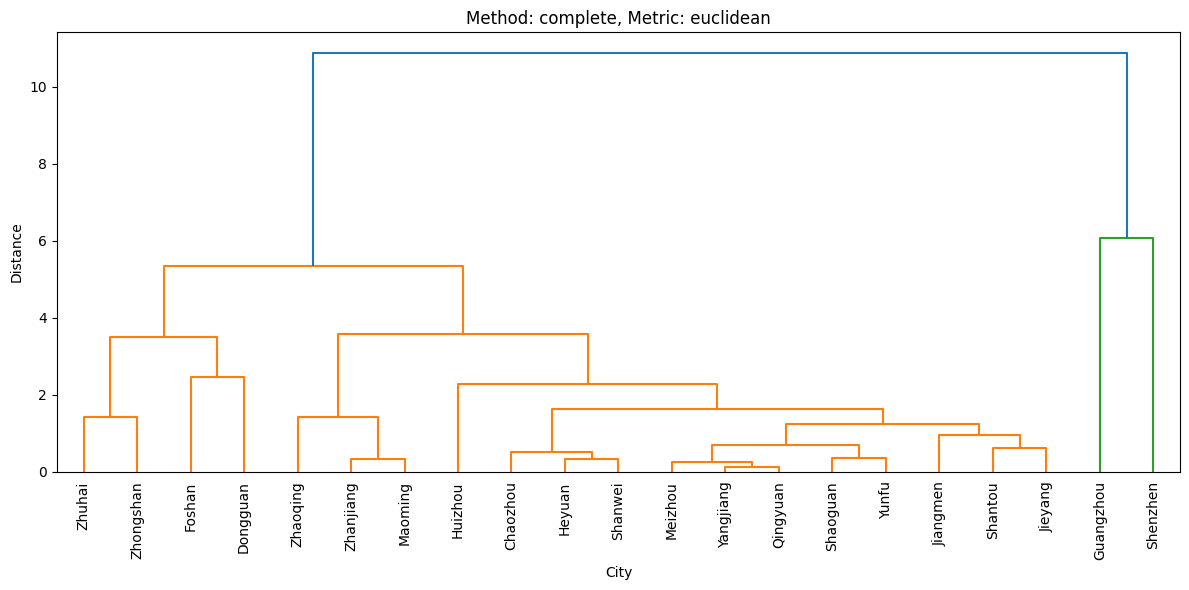

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

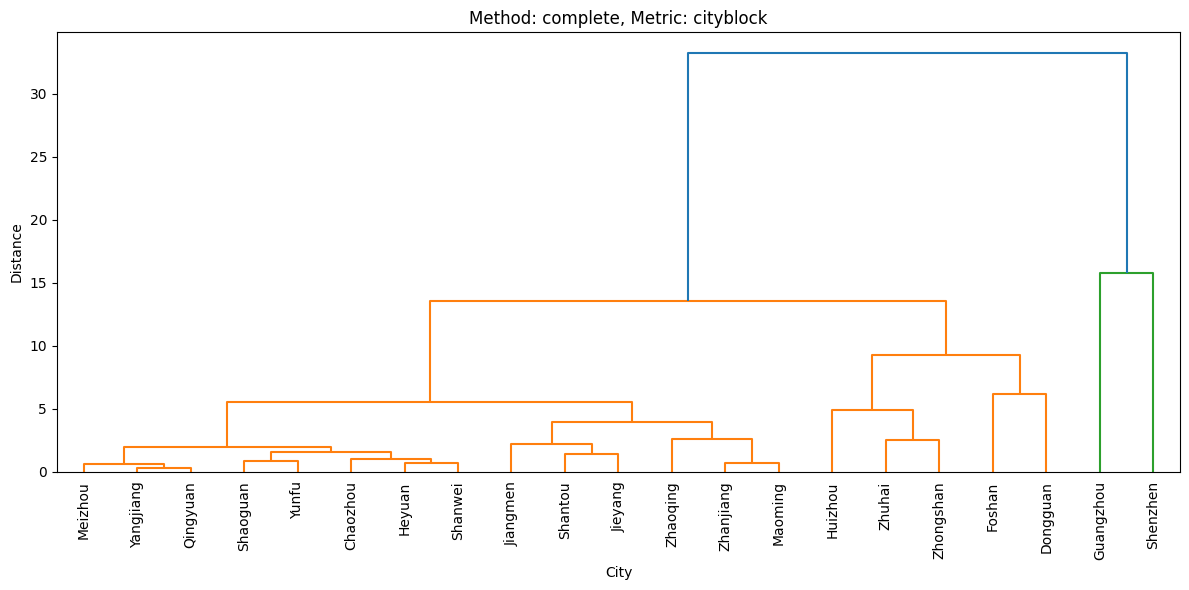

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

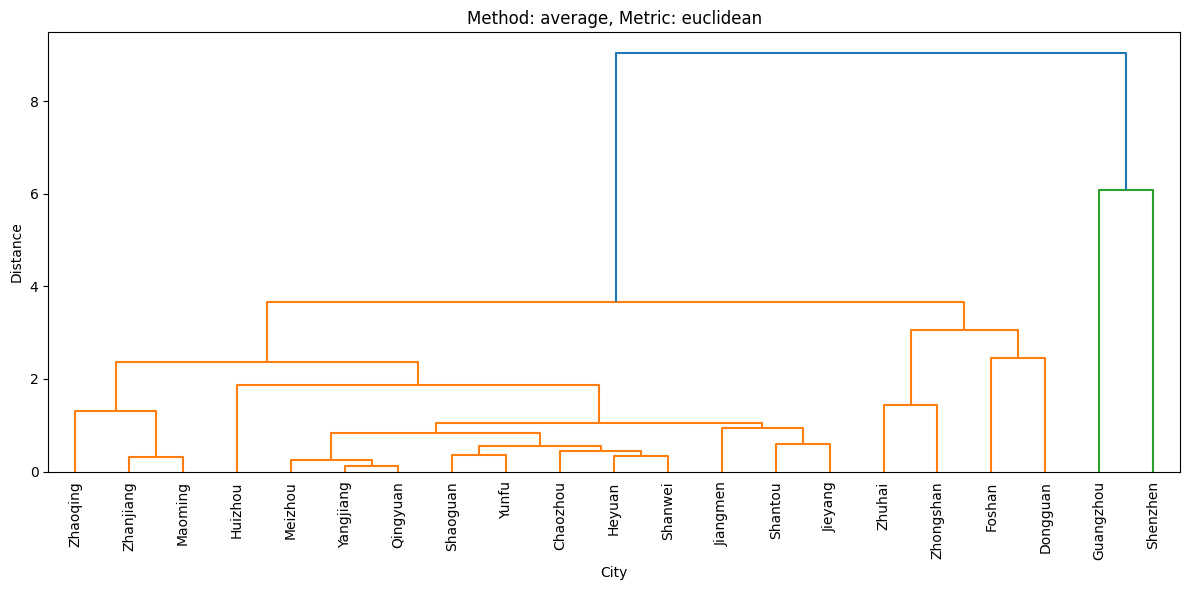

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

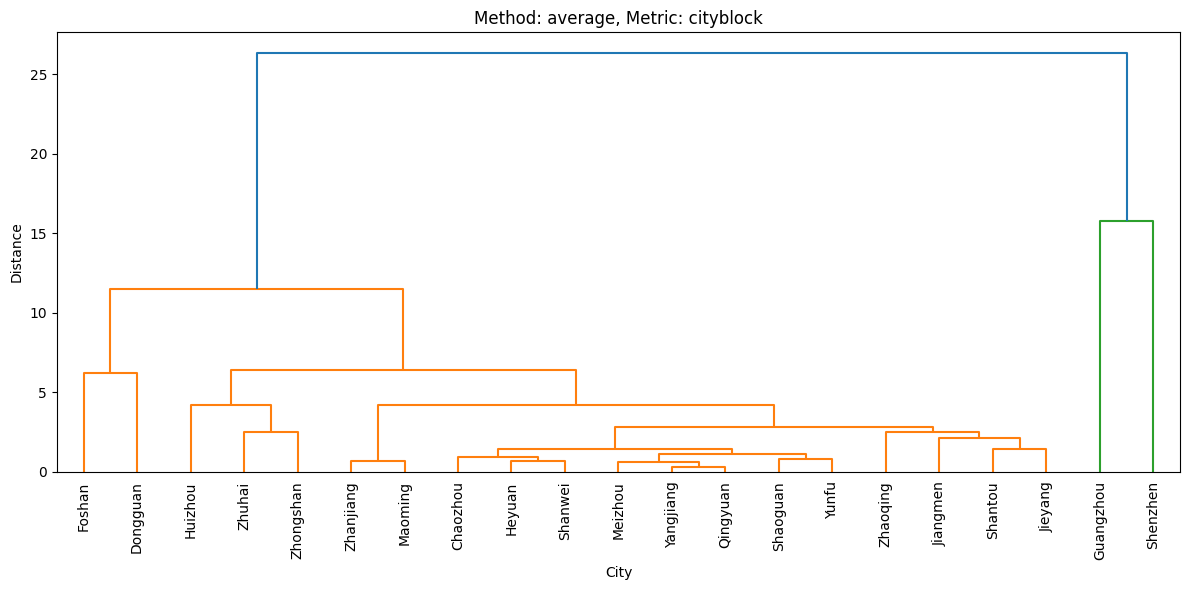

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

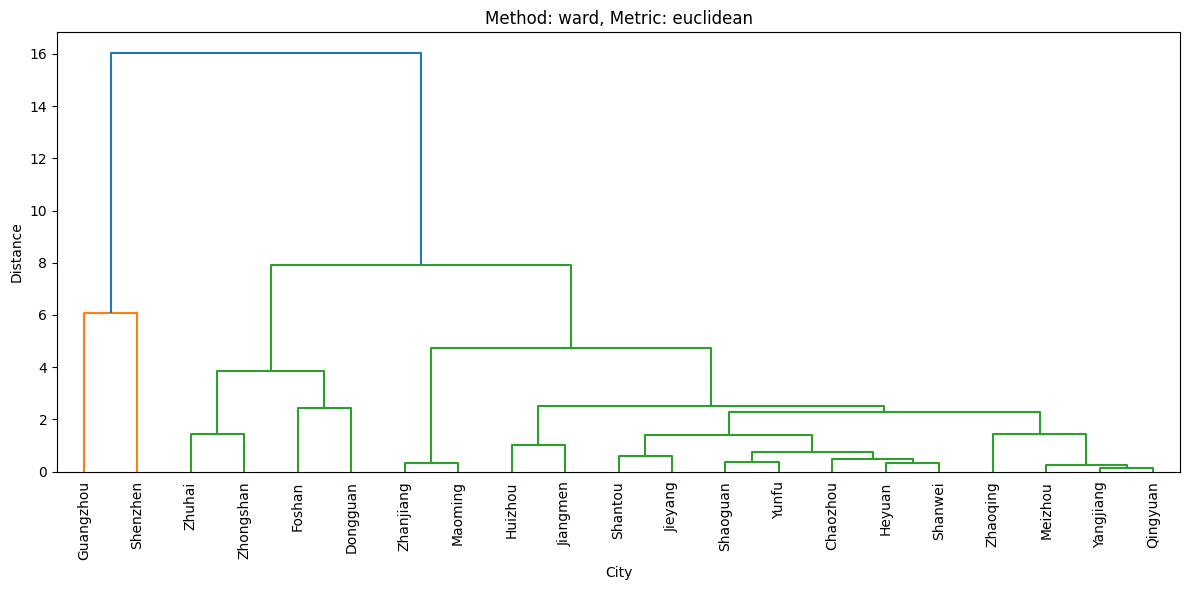

In [42]:
# 导入必要的库
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据
file_path = "nihao.xlsx"  # 替换为实际文件路径
df = pd.read_excel(file_path, header=1)

# 数据预处理
# 1. 删除缺失值
df = df.dropna()
# 2. 提取数值列
numeric_cols = df.select_dtypes(include=[np.number]).columns
data_numeric = df[numeric_cols]


df.columns = df.columns.str.strip()

# 3. 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# 4. 提取城市名称
city_labels = df['City'].values

# 定义不同距离和方法
methods = ['single', 'complete', 'average', 'ward']  # 聚类方法
metrics = ['euclidean', 'cityblock']  # 距离度量

# 遍历每种距离和方法，绘制谱系图
for method in methods:
    for metric in metrics:
        if method == 'ward' and metric != 'euclidean':
            # Ward 方法仅支持欧氏距离
            continue
        
        # 聚类
        linked = linkage(data_scaled, method=method, metric=metric)
        
        # 绘制谱系图
        plt.figure(figsize=(12, 6))
        dendrogram(linked, labels=city_labels, leaf_rotation=90)
        # plt.title(f"聚类方法: {method}, 距离度量: {metric}") # change to English
        plt.title(f"Method: {method}, Metric: {metric}")
        plt.xlabel("City")
        plt.ylabel("Distance")
        plt.tight_layout()
        plt.show()



#### 距离度量对聚类结果的影响

不同的距离度量方法对数据点间的相似性定义不同，适用的场景和结果也有所差异：

1. **欧氏距离 (Euclidean Distance)**：  
   适用于衡量数据全局差异，特别是总量较大的指标（如 GDP）。其结果倾向于形成紧密的聚类，但对数值差异较大的变量敏感，容易放大某些城市的影响力。

2. **曼哈顿距离 (Cityblock Distance)**：  
   适合分析逐项指标的绝对差异，尤其当各指标分布均匀时，结果更能反映细化的差异。但相比欧氏距离，可能会形成更多的小簇。

---

#### 聚类方法对结果的影响

聚类方法主要影响簇的形状和组内一致性：

1. **单连接法 (Single Linkage)**：  
   通过最近点定义簇间距离，容易形成链式聚类。适用于分析稀疏数据，但容易导致长而松散的簇。

2. **完全连接法 (Complete Linkage)**：  
   使用最远点定义簇间距离，结果紧密且组内差异小，但可能导致某些簇过小。

3. **平均连接法 (Average Linkage)**：  
   结合所有点间的平均距离，能综合体现簇的整体相似性，适用于大多数场景。

4. **Ward 方法 (Ward's Method)**：  
   通过最小化组内平方和，确保结果分布均衡。适合等方差数据，能生成结构合理的聚类。

---

#### 结果对比

通过绘制谱系图，分析各方法的聚类过程：

- 相似性高的城市（如广州、深圳）通常最早聚合。
- 单连接法可能导致部分城市单独形成长链。
- Ward 方法更倾向于在早期合并相似性高的城市，最终分布均衡。
- 欧氏距离在 Ward 方法中表现最佳，而曼哈顿距离倾向于生成更多的小簇。


从聚类谱系图（Dendrogram）中可以观察到：

初步分组：经济发展水平相近的城市首先被聚为一组，例如深圳、广州、佛山等城市组成高经济水平的簇。

中间分组：中等发展水平的城市，如惠州、江门、中山等被分为另一个明显的簇。

低经济水平的城市：如韶关、河源、梅州等，组成低经济发展水平的簇，距离较远。

#### 最终分组解读

根据分析，将城市划分为以下四组：

1. **第一组：核心城市**（广州、深圳）  
   特征：GDP 高、固定资产投资多、第三产业贡献显著，属于全省经济引擎。

2. **第二组：工业型城市**（佛山、中山）  
   特征：第二产业增加值高，进出口贸易活跃，工业基础扎实。

3. **第三组：农业型城市**（韶关、河源等）  
   特征：第一产业占比较大，经济总量较低，需加强基础设施建设。

4. **第四组：服务型城市**（珠海、汕头等）  
   特征：第三产业占比较高，发展潜力较大，但需加大产业升级力度。

---

#### 应用与建议

- **政策制定**：核心城市应加强区域带动作用；工业型城市需优化产业结构；农业型城市重点发展基础设施与教育资源；服务型城市可加快第三产业扩展。
- **资源分配**：根据分组结果，科学分配财政支持与基础设施投资，提高整体发展均衡性。
- **未来发展**：通过对各组的长期跟踪分析，动态调整区域发展策略。

通过本次分析，能为广东省的区域经济规划提供更明确的依据。